In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [3]:
path_background = './test_imgs/IMG_4903.JPG'
path_cat = './test_imgs/great_cat.jpg'

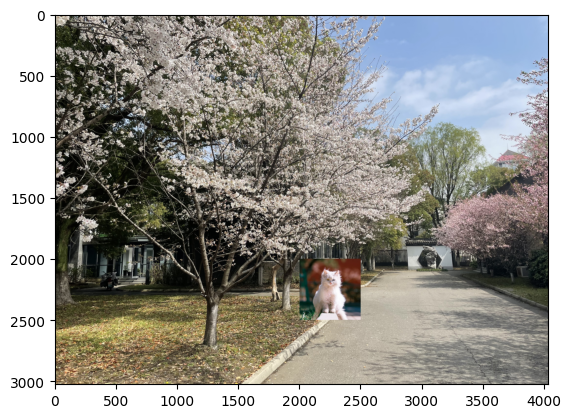

In [4]:
img_background = cv.imread(path_background)
img_cat = cv.imread(path_cat)
img_cat_resized = cv.resize(img_cat, (500, 500))
img_background_copy = img_background.copy()
img_background_copy[2000:2500, 2000:2500] = img_cat_resized
plt.imshow(img_background_copy[:, :, ::-1])

In [15]:
def addWeights_LimgAddSimg(largeImg, alpha, smallImg, beta, gamma=0, TopLeftPos=(0, 0)):
    large_W, large_H = largeImg.shape[1::-1]
    small_W, small_H = smallImg.shape[1::-1]
    x, y = TopLeftPos
    if large_W < small_W or large_H < small_H:
        raise ValueError(f"{largeImg}'size must more than {smallImg}'size")
    else:
        largeImg_copy = largeImg.copy()
        if x + small_W >= large_W:
            x = large_W - small_W
        if y + small_H >= large_H:
            y = large_H - small_H
        temp_largeImg = largeImg_copy[y:y + small_H, x:x + small_W]
        temp_img = cv.addWeighted(temp_largeImg, alpha, smallImg, beta, gamma)
        largeImg_copy[y:y + small_H, x:x + small_W] = temp_img
    return largeImg_copy

In [16]:
img_addWeighted = addWeights_LimgAddSimg(img_background, 0.5, img_cat, 0.7, 0, (2500, 2500))

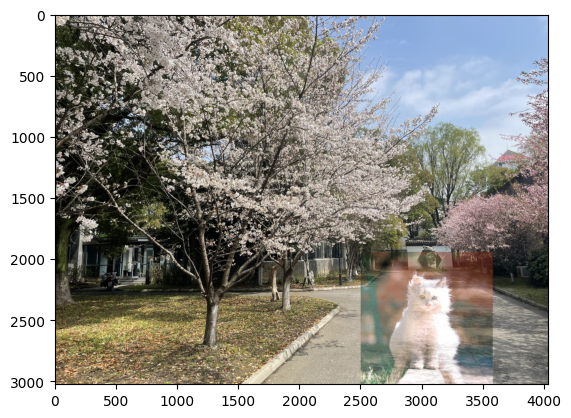

In [18]:
plt.imshow(cv.cvtColor(img_addWeighted, cv.COLOR_BGR2RGB))